In [116]:
import numpy as np
import scipy
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from scipy.stats import gamma

import matplotlib
from matplotlib.lines import Line2D
font = {'family' : 'arial',
        'size'   : 15}
matplotlib.rc('font', **font)
import seaborn as sns
sns.set(style = 'whitegrid', font_scale = 1.5)

### Conversion between the fraction of infected individuals resulting in 80% of secondary infections estimated in Miller et al., Nature Communications, 2020 and the variance in offspring number

Miller et al., Nature Communications, 2020 estimated the fraction of infected individuals resulting in 80% of secondary infections to be 2% to 10% and a basic reproduction number between 2 and 3 using data from the period of February 23 to April 22, 2020 in Israel. Our goal is to convert this estimate to a variance in offspring number to be able to compare with our results. 

To do this, we use the theory developed in Lloyd-Smith et al., 2005:


Assume that the individual reproductive numbers $\nu$ are distributed according to a gamma distribution with mean $R_0$ and dispersion $k$. This results in a negative binomial distribution of offspring numbers with variance over mean of $1+\frac{R_0}{k}$.

$f_v(x)$ = Gamma(x, $\mu = R_0$, dispersion = $k$)

The cumulative distribution function is given by

$F_v(x)$ = $\int_0^x{f_v(u)du}$

The expected proportion of all transmission due to infectious individuals with $\nu<x$ is given by

$F_{\rm trans}(x) = \frac{1}{R_0}\int_0^x{uf_v(u)du}$ 

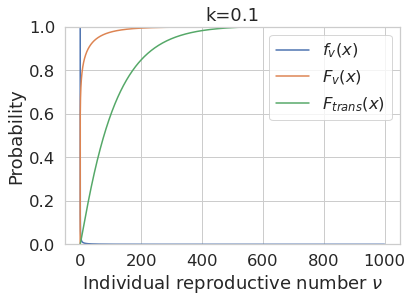

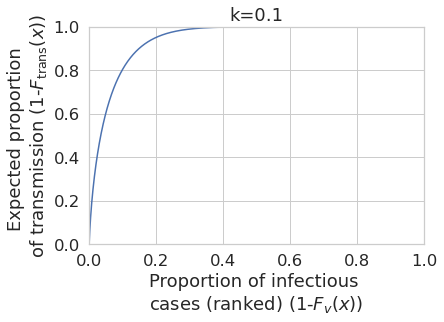

In [117]:
x = np.logspace(-40,3,10000) 
R0 = 10
k = 0.1#0.1

shape = k # shape 
scale = R0/k # scale
fv = gamma.pdf(x, shape, loc=0, scale=scale)

Fv = gamma.cdf(x, shape, loc=0, scale=scale)
Ftrans = (1/R0)*(np.cumsum(x[:-1]*fv[:-1]*np.diff(x)))

plt.plot(x, fv, label = '$f_v(x)$')
plt.plot(x, Fv, label = '$F_v(x)$')
plt.plot(x[:-1], Ftrans, label = '$F_{trans}(x)$')
plt.xlabel('Individual reproductive number $\\nu$')
plt.ylabel('Probability')
plt.title('k=' + str(k))
plt.legend()
plt.ylim([0,1])
plt.show()

plt.plot(1-Fv[:-1], 1-Ftrans)
plt.xlabel('Proportion of infectious \ncases (ranked) (1-$F_v(x)$)')
plt.ylabel('Expected proportion \nof transmission (1-$F_{\\rm trans}(x)$)')
plt.title('k=' + str(k))
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

### Calculate the expected proportion of transmission due to the most infectious 20% of cases

Reproducing Figure 1c in Lloyd-Smith et al, 2005 (although note that the x axes of Figure 1c does not match with the data in Supplementary Table 1 - our results match with Supplementary Table 1). 

First find $x_{20}$ such that $1-F_v(x_{20}) = 0.2$, then calculate $t_{20}=1-F_{\rm trans}(x_{20})$.

In [118]:
ks = np.arange(0.01, 10, 0.01)
tstars = []
for k in ks:

    x = np.logspace(-40,3,10000) 
    R0 = 2

    shape = k # shape 
    scale = R0/k # scale
    fv = gamma.pdf(x, shape, loc=0, scale=scale)

    Fv = gamma.cdf(x, shape, loc=0, scale=scale)
    Ftrans = (1/R0)*(np.cumsum(x[:-1]*fv[:-1]*np.diff(x)))
    
    ind = np.where(Fv<0.8)[0][-1]
    # xstar = x[ind]
    tstar = 1-Ftrans[ind]
    tstars.append(tstar)

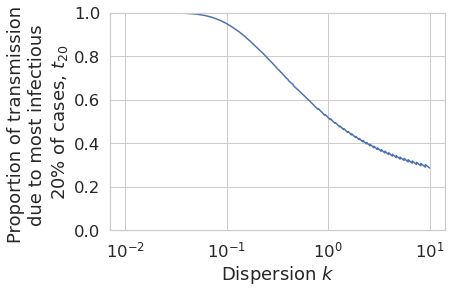

In [119]:
plt.plot(ks, tstars)
plt.xscale('log')
plt.ylim([0, 1])
plt.xlabel('Dispersion $k$')
plt.ylabel('Proportion of transmission \ndue to most infectious \n20% of cases, $t_{20}$')
plt.show()

### Next use an analogous approach to calculate the fraction of infected individuals responsible for 80% of secondary infections

First find $x_{80}$ such that $1-F_{trans}(x_{80}) = 0.8$, then calculate $p_h=1-F_v(x_{80})$, where $p_h$ is the fraction of infected individuals responsible for 80% of secondary infections.

In [120]:
ks = np.arange(0.01, 50, 0.01)
tstars = []
for k in ks:

    x = np.logspace(-40,3,10000) 
    R0 = 2

    shape = k # shape 
    scale = R0/k # scale
    fv = gamma.pdf(x, shape, loc=0, scale=scale)

    Fv = gamma.cdf(x, shape, loc=0, scale=scale)
    Ftrans = (1/R0)*(np.cumsum(x[:-1]*fv[:-1]*np.diff(x)))
    
    ind = np.where(Ftrans<0.2)[0][-1]
    # xstar = x[ind]
    tstar = 1-Fv[ind]
    tstars.append(tstar)

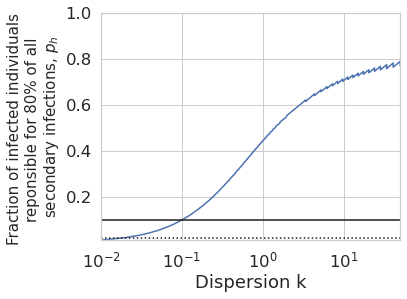

In [144]:
plt.figure(figsize = (6,4.5))
plt.plot(ks, tstars)
plt.plot([10**-2, 50], [0.1,0.1], 'k')
plt.plot([10**-2, 50], [0.02,0.02], 'k:')

plt.xscale('log')
# plt.yscale('log')
plt.xlim([10**-2, 50])
plt.ylim([10**-2, 1])
plt.xlabel('Dispersion k')
plt.ylabel('Fraction of infected individuals \nreponsible for 80% of all \nsecondary infections, $p_h$', fontsize = 15)
plt.tight_layout()

plt.savefig('../../figures/figure_outputs/miller2020_conversion_to_offspring_num_var.png', dpi = 300)
plt.savefig('../../figures/figure_outputs/miller2020_conversion_to_offspring_num_var.pdf')
plt.show()

# Convert from dispersion to the variance in offspring number

The variance in offspring number is given by

$\sigma^2 = R_0(1+\frac{R_0}{k})$

In [113]:
R0 = 2.5

ind = np.where(np.array(tstars)<0.02)[0][-1]
k = ks[ind]
var = R0*(1+R0/k)
print('p_h = 0.02, k =', k, ', var =', var)

ind = np.where(np.array(tstars)<0.1)[0][-1]
k = ks[ind]
var = R0*(1+R0/k)
print('p_h = 0.1, k =', round(ks[ind],2), ', var =', round(var))

p_h = 0.02, k = 0.01 , var = 627.5
p_h = 0.1, k = 0.1 , var = 65


In Miller et al., Nature Communications, 2020, it was found that $p_h$ ranged from 2% to 10% and the corresponding $R_0$ ranged from 2 to 3. Using these values, we find that the variance in offspring number is between 65 and 627.5, which is quite high. 

However, we note that the data that was used was collected from February 23 to April 22, 2020, which is very early in the pandemic and before the start time of our analysis.